In [1]:
import numpy as np
import numpy.random as rd
import pandas as pd

import copy, sys
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# 確率関数
def P(x1, x2, x3, theta):
    Z =  2*np.exp(3*theta) + 6*np.exp(-theta)   # 正規化定数
    return np.exp(theta*x1*x2 + theta*x2*x3 + theta*x3*x1)/Z


In [3]:
def random_select():
    """
    0, 1, 2の中から１つランダムに選ぶ
    """
    return rd.randint(0, 3)

label_name = {'111':0, '-111':1, '1-11':2, '11-1':3, '-1-11':4, '1-1-1':5, '-11-1':6, '-1-1-1':7}

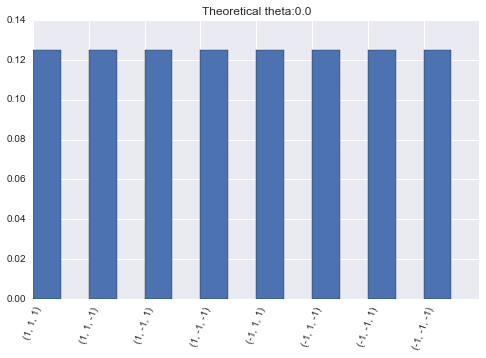

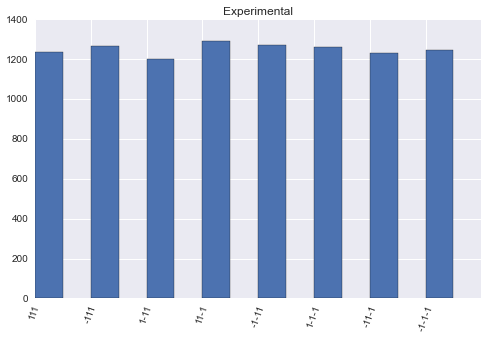

/Users/matsuken/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


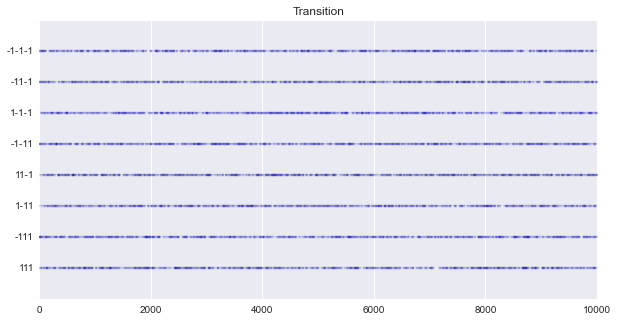

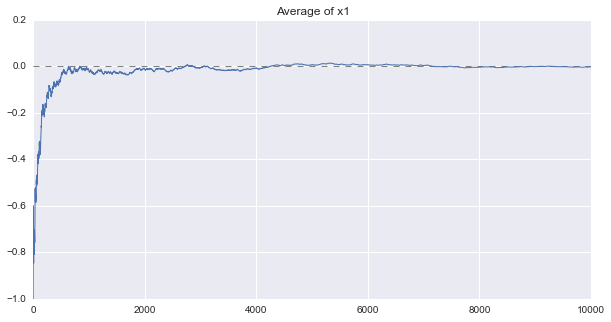

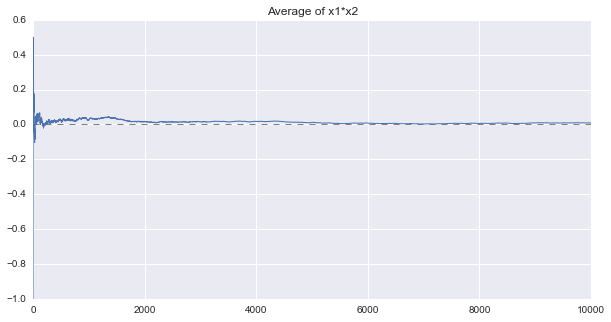

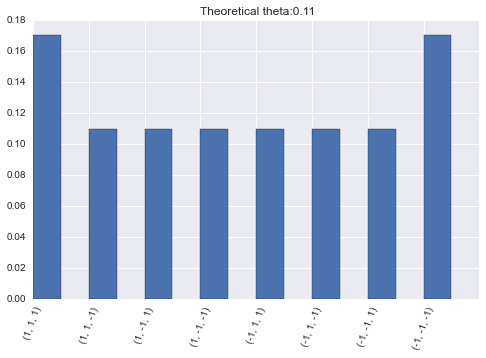

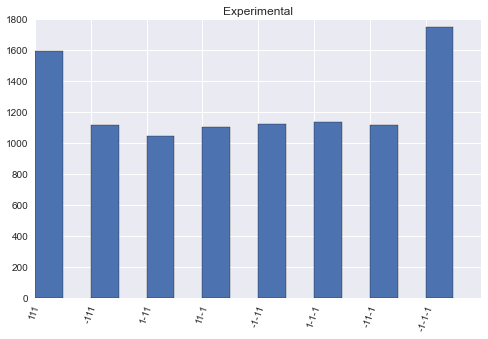

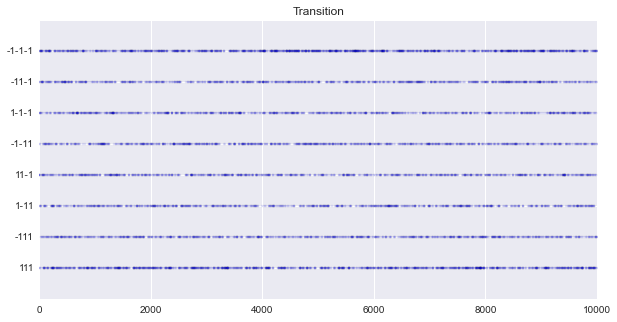

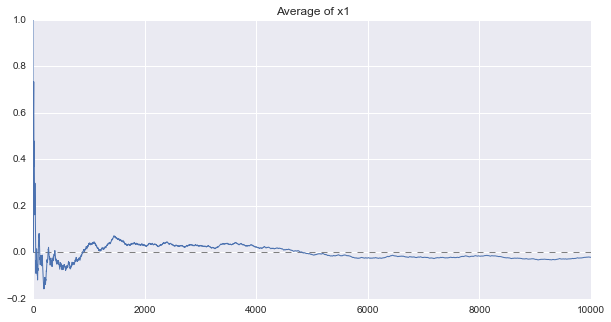

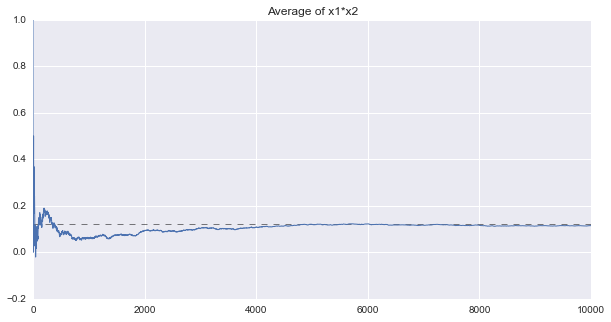

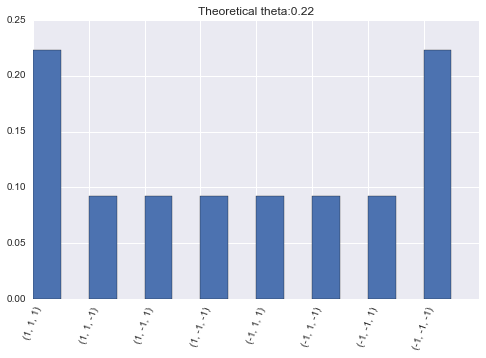

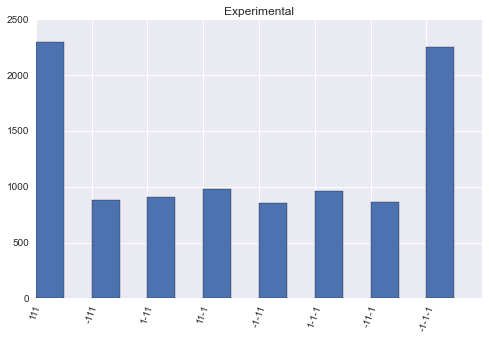

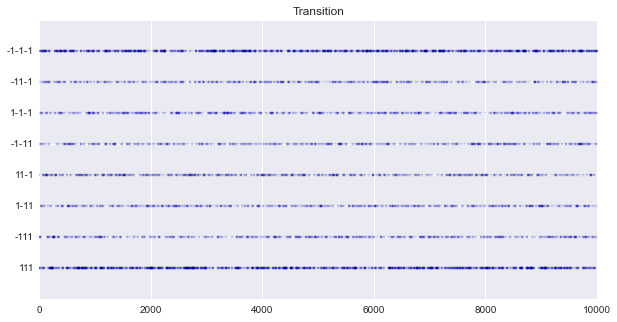

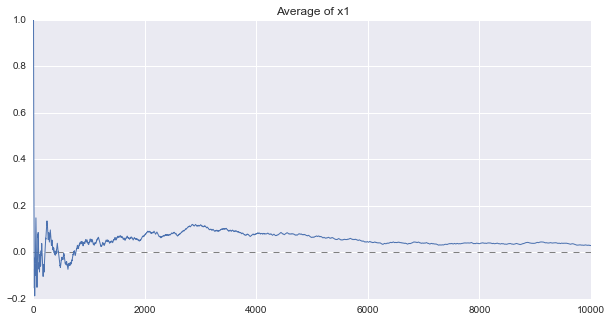

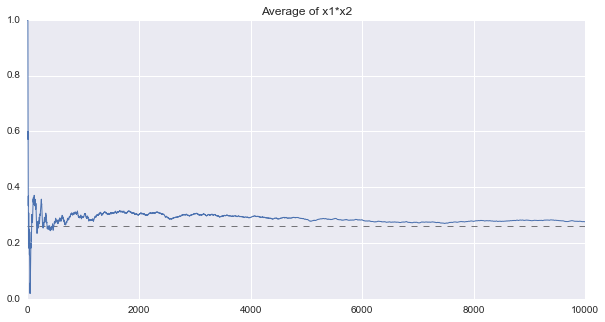

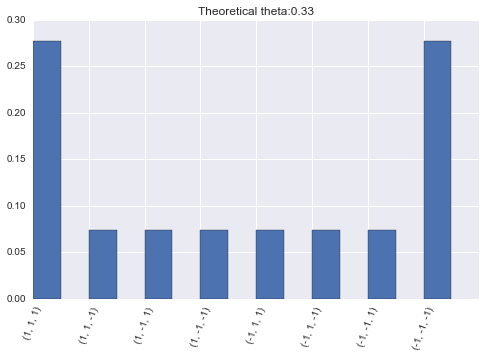

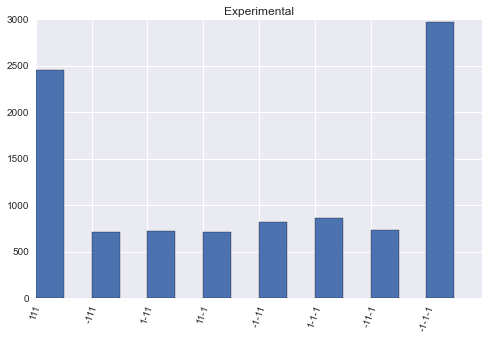

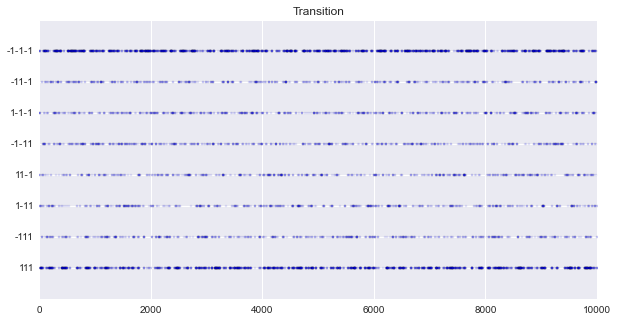

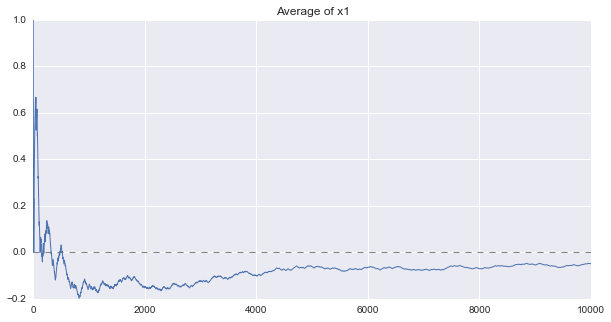

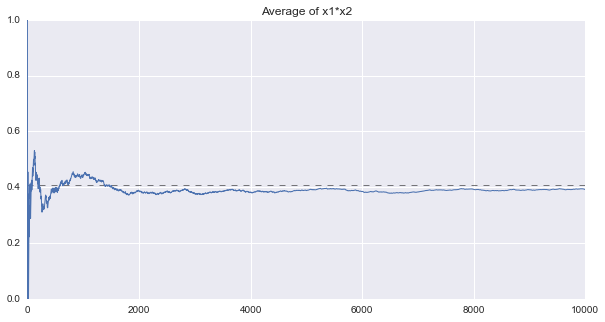

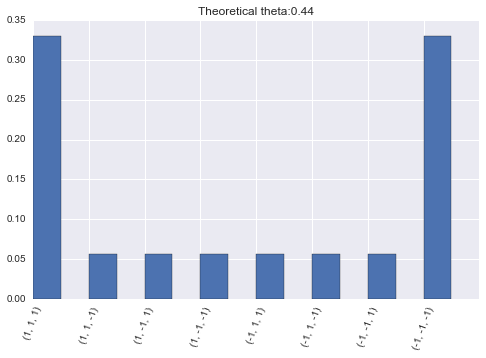

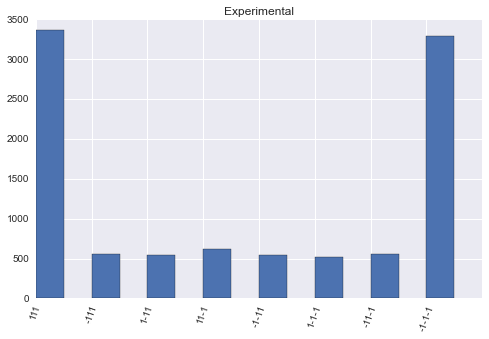

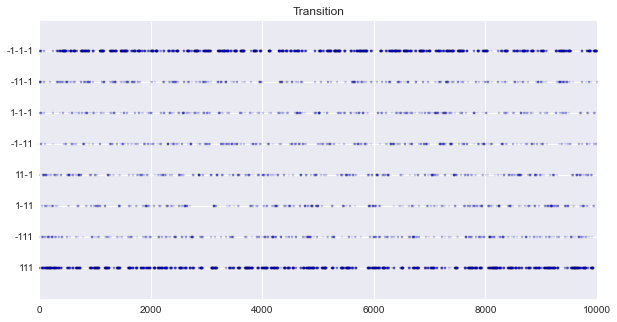

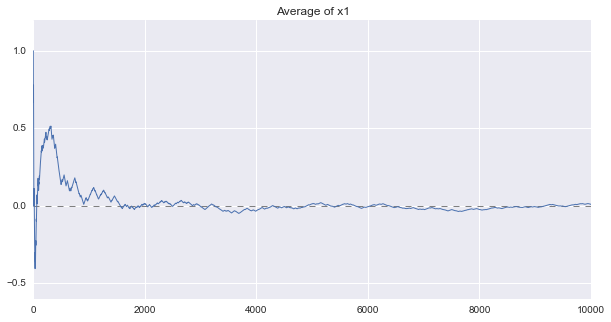

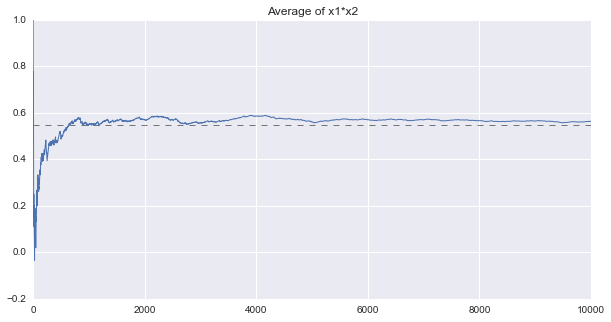

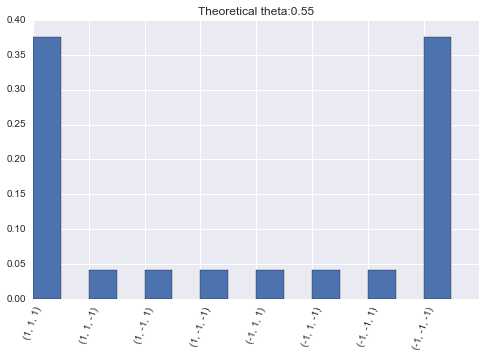

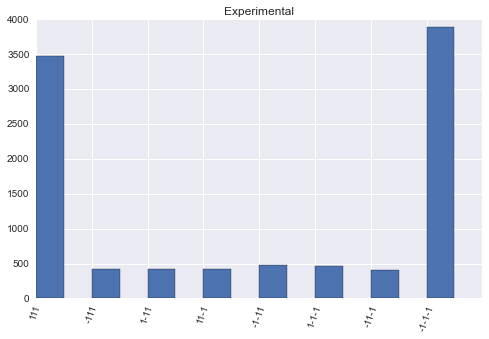

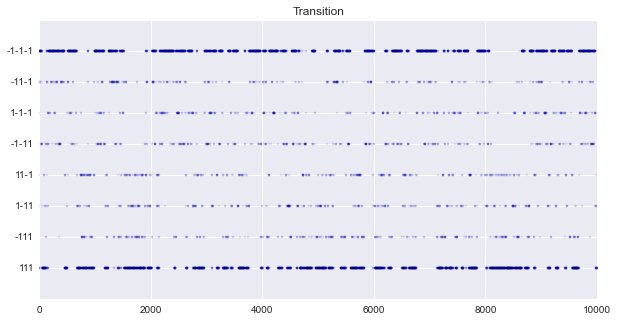

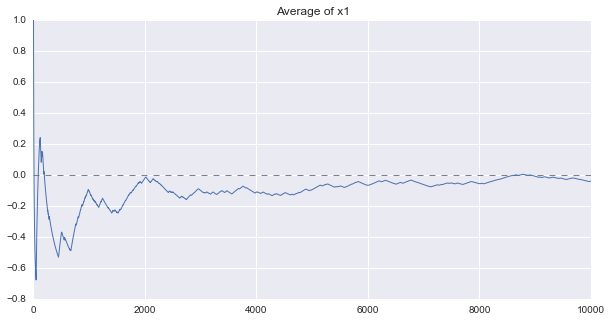

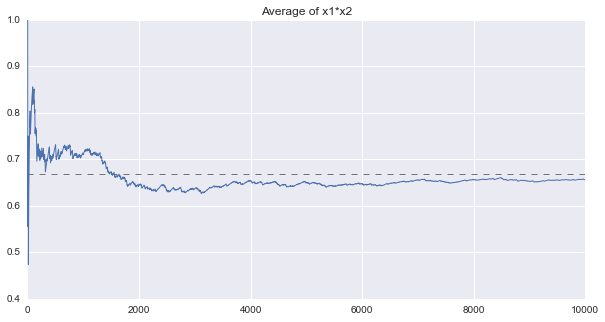

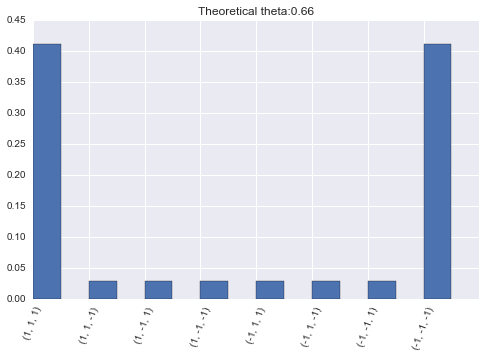

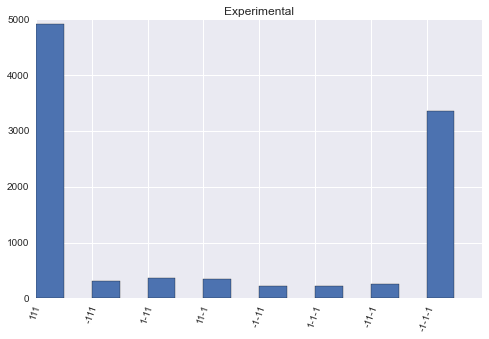

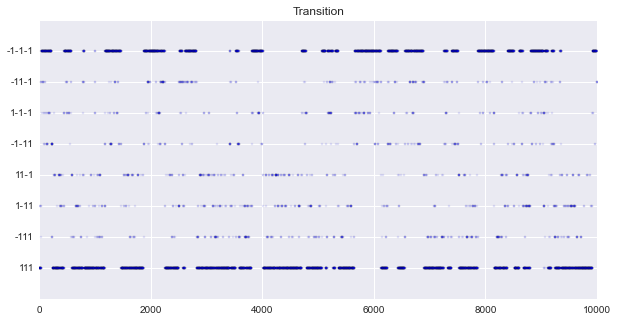

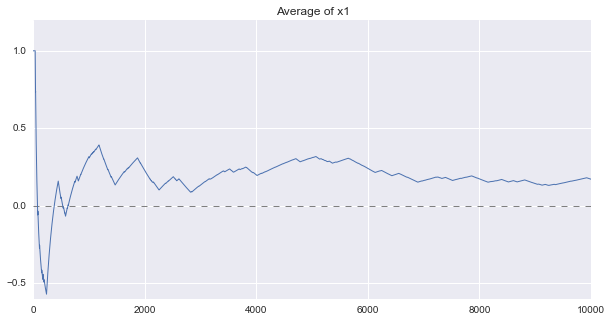

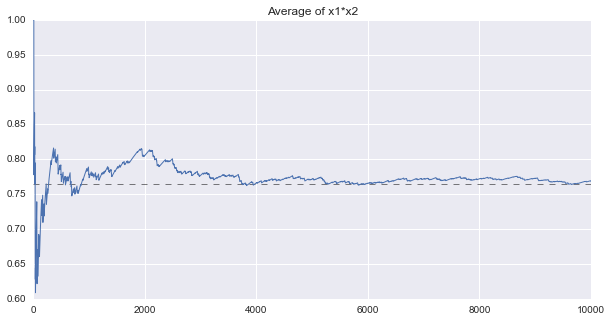

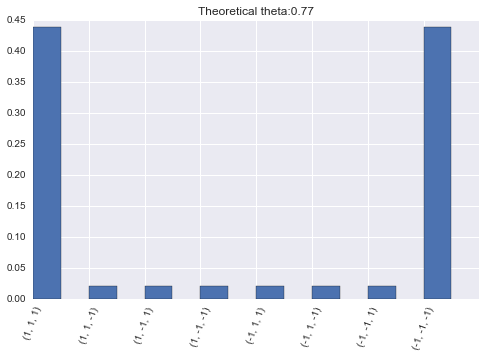

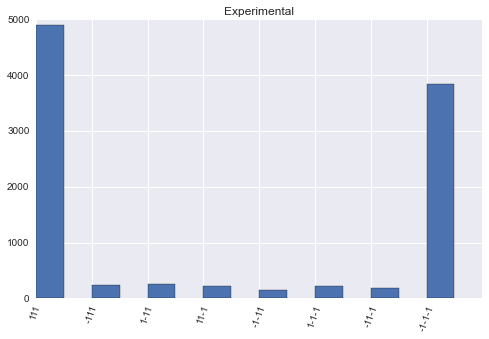

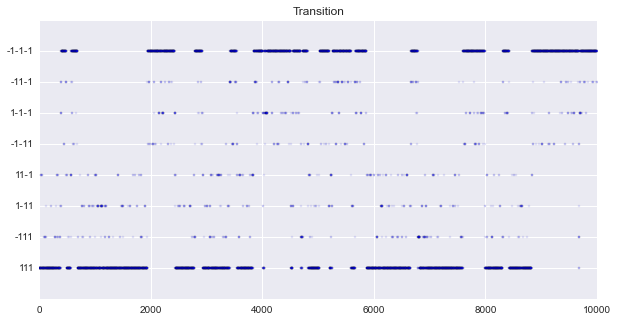

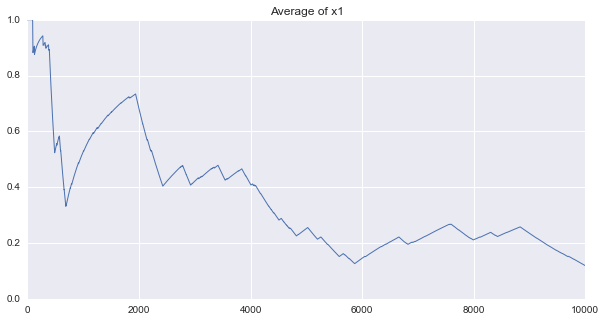

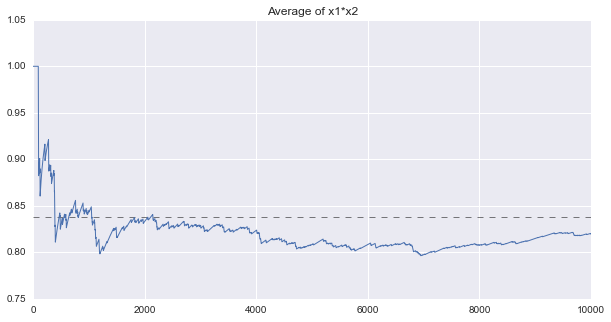

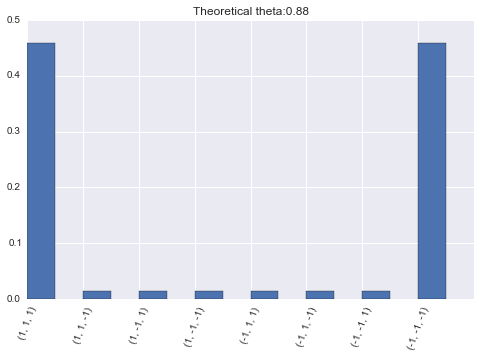

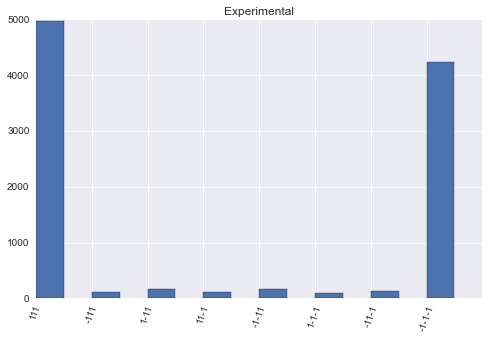

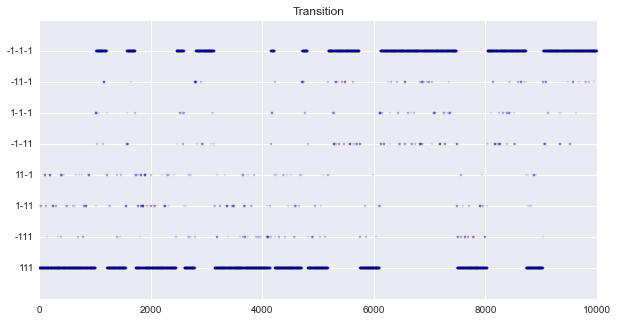

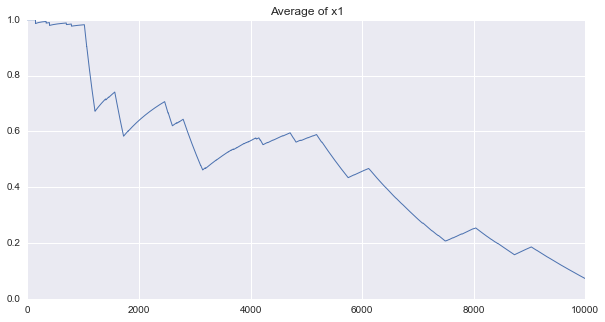

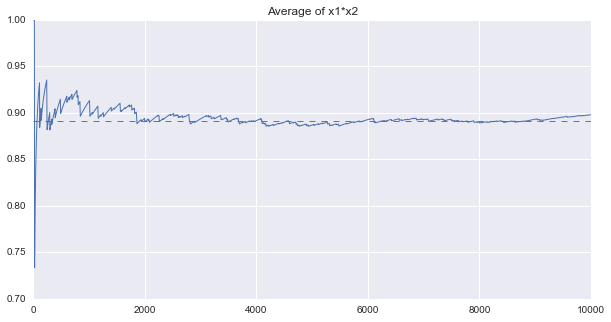

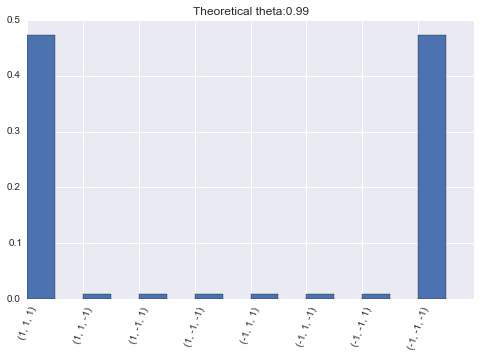

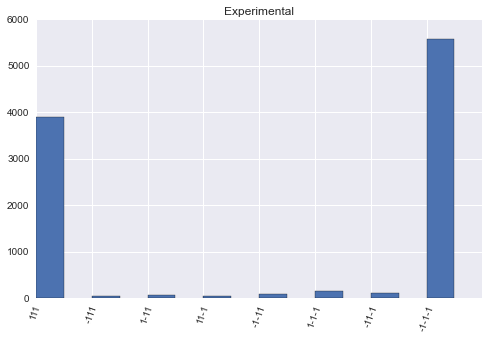

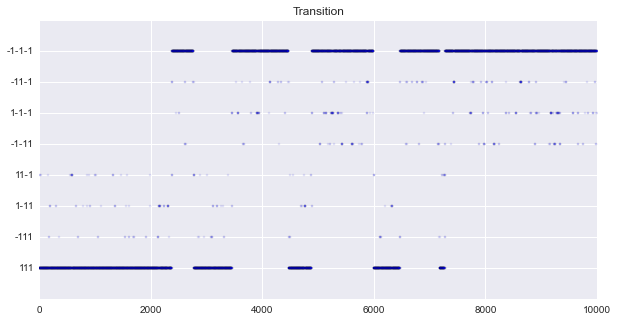

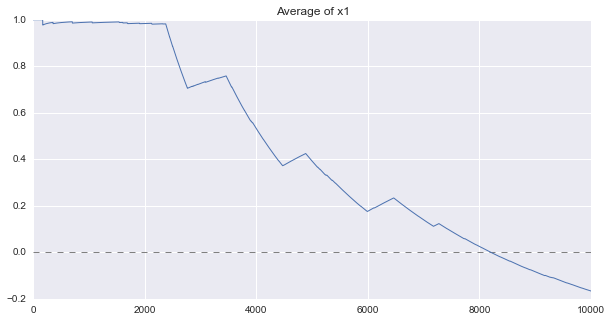

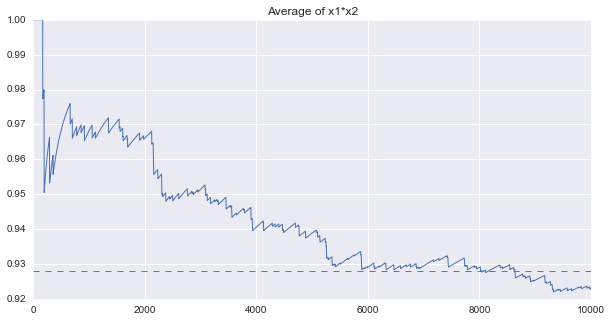

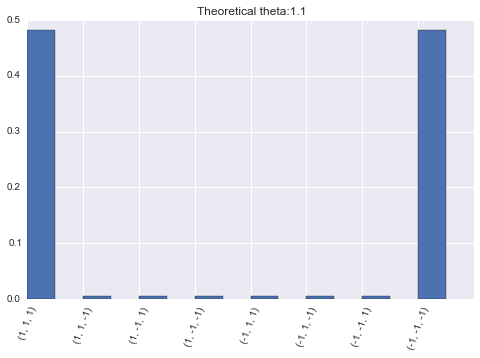

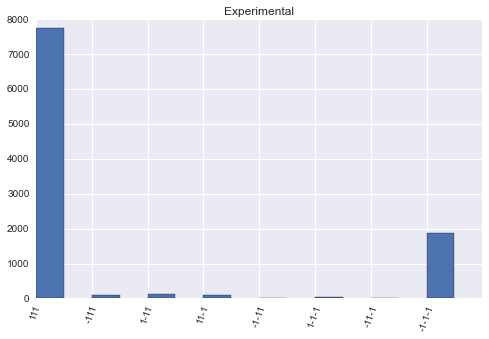

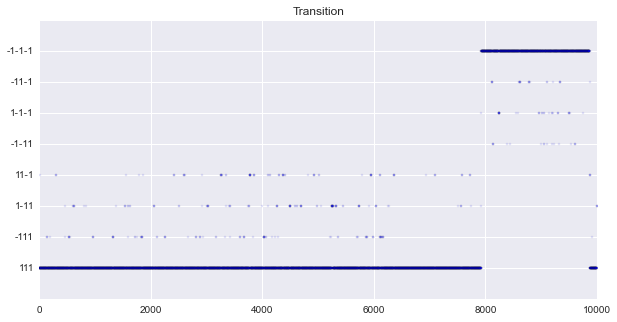

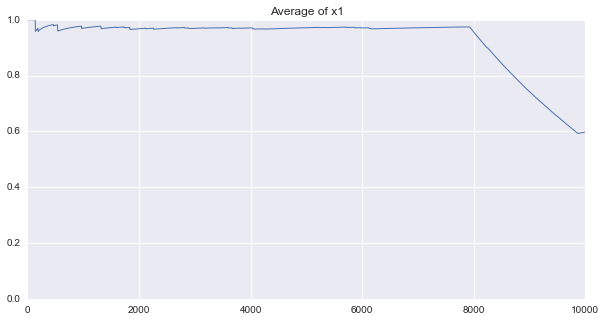

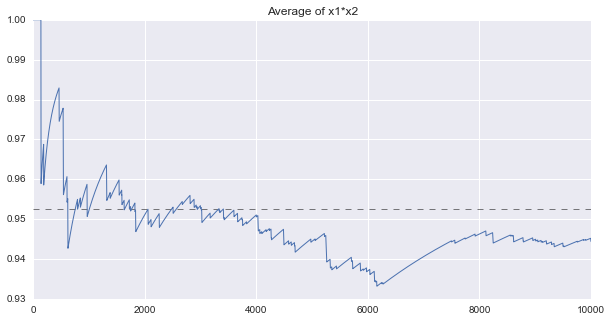

In [4]:
for theta in np.linspace(0,1.1,11):
    
    plt.figure(figsize=(8,5))
    plt.bar(range(8), [P(x1, x2, x3, theta) for x1 in [1,-1] for x2 in [1,-1] for x3 in [1,-1]], width=.5 )
    plt.title("theta:{0}".format(theta))
    plt.xticks(range(8), map(lambda x: str(x), [(x1, x2, x3) for x1 in [1,-1] for x2 in [1,-1] for x3 in [1,-1]] ),
               rotation=70)
    plt.title("Theoretical theta:{}".format(theta))
    plt.show()

    # 初期値
    init = [1, 1, 1]
    prev = copy.copy(init)
    sample = []
    n_trial = 10000

    for i in range(n_trial):
        P_prev = P(init[0], init[1], init[2], theta)
        next = copy.copy(prev)

        idx = random_select()
        next[idx] = -1 * next[idx]
        P_next = P(next[0], next[1], next[2], theta)
        r = P_next/P_prev

        if r > 1 or r > rd.uniform(0, 1):
            # 0-1の一様乱数がrより大きい時は状態を更新する。     
            prev = copy.copy(next)

        sample.append(prev)

    data = pd.factorize(map(lambda x: "{}{}{}".format(x[0],x[1],x[2],) ,sample))

    res = {}
    for v, la in zip(Counter(data[0]).items(), data[1]):
        #print v[0], v[1], la, label_name[la]
        res[label_name[la]] = (la, v[1])
    plt.figure(figsize=(8,5))
    plt.bar(range(8), [res[i][1] for i in range(8)], width=0.5)
    plt.xticks(range(8),[res[i][0] for i in range(8)], rotation=70)
    plt.title("Experimental")
    plt.show()

    m = 10000
    data2 = map(lambda x: label_name["{}{}{}".format(x[0],x[1],x[2])] ,sample)
    plt.figure(figsize=(10,5))
    plt.xlim(0, m)
    plt.scatter(range(m), data2[:m], alpha=.1, s=5)
    plt.yticks(range(9),['111', '-111', '1-11', '11-1', '-1-11', '1-1-1', '-11-1', '-1-1-1',''])
    plt.title("Transition")
    plt.show()

    for j, smpl in enumerate([np.array(sample)[:,0], map(lambda x: x[0]*x[1], np.array(sample)[:,0:2])]):
        ave = []
        for i, d in enumerate(smpl):
            if i == 0:
                ave.append(float(d))
            else:
                ave.append( (ave[i-1]*i + d)/float(i+1) )

                
        plt.figure(figsize=(10, 5))
        plt.xlim(0, len(smpl))
        if j==0:
            pass
            plt.plot([0,len(smpl)],[0,0], "k--", lw=.5)
        else:
            expect = (2*np.exp(3*theta) - 2*np.exp(-theta) ) / (2*np.exp(3*theta) + 6*np.exp(-theta))
            plt.plot([0,len(smpl)],[expect,expect], "k--", lw=.5)
        
        
        plt.title("Average of {}".format("x1" if j==0 else "x1*x2"))
        plt.plot(ave, lw=1)

    